In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


crypto_path = "resources/cleaned_crypto.csv"
gold_path = "resources/gold_monthly_csv.csv"

crypto_data = pd.read_csv(crypto_path,low_memory=False)
crypto_data = crypto_data[crypto_data.crypto_name != 'Innovative Bioresearch Classic']

crypto_data.head(10)

,Unnamed: 0,trade_date,volume,price_usd,market_cap,capitalization_change_1_day,USD_price_change_1_day,crypto_name,crypto_type,ticker,minable,trade_year,trade_month,trade_day
0,0,2016-01-01,36278900.0,434.33,6.529300e+09,0.000000,0.000000,Bitcoin,0.0,BTC,1.0,2016,1,1
1,1,2016-01-02,30096600.0,433.44,6.517390e+09,-0.001824,-0.002049,Bitcoin,0.0,BTC,1.0,2016,1,2
2,2,2016-01-03,39633800.0,430.01,6.467430e+09,-0.007666,-0.007913,Bitcoin,0.0,BTC,1.0,2016,1,3
3,3,2016-01-04,38477500.0,433.09,6.515713e+09,0.007466,0.007163,Bitcoin,0.0,BTC,1.0,2016,1,4
4,4,2016-01-05,34522600.0,431.96,6.500393e+09,-0.002351,-0.002609,Bitcoin,0.0,BTC,1.0,2016,1,5
5,5,2016-01-06,34042500.0,429.11,6.458942e+09,-0.006377,-0.006598,Bitcoin,0.0,BTC,1.0,2016,1,6
6,6,2016-01-07,87562200.0,458.05,6.896279e+09,0.067710,0.067442,Bitcoin,0.0,BTC,1.0,2016,1,7
7,7,2016-01-08,56993000.0,453.23,6.825700e+09,-0.010234,-0.010523,Bitcoin,0.0,BTC,1.0,2016,1,8
8,8,2016-01-09,32278000.0,447.61,6.742767e+09,-0.012150,-0.012400,Bitcoin,0.0,BTC,1.0,2016,1,9
9,9,2016-01-10,35995900.0,447.99,6.750440e+09,0.001138,0.000849,Bitcoin,0.0,BTC,1.0,2016,1,10


In [2]:
##Finding the top and bottom 5 performers based on the increase/decrease rate of the yearly average market cap

mc_mean = crypto_data.groupby(["crypto_name","trade_year"]).agg({"market_cap" : "mean"})

mc_mean= mc_mean[mc_mean['market_cap'] != 0]
mc_mean['pct_ch'] = (mc_mean.groupby('crypto_name')['market_cap'].apply(pd.Series.pct_change) + 1)

mc_mean.head(30)

market_cap    pct_ch
crypto_name trade_year                        
 Governance 2020        2.581800e+07       NaN
 HBZ coin   2019        6.531329e+05       NaN
            2020        6.483431e+05  0.992666
 Maxcoin    2016        2.076652e+05       NaN
            2017        1.681900e+06  8.099092
            2018        2.439259e+06  1.450300
            2019        5.667983e+05  0.232365
            2020        2.160385e+05  0.381156
 Token      2018        1.616220e+05       NaN
            2019        8.592957e+05  5.316701
            2020        2.624289e+05  0.305400
#MetaHash   2019        1.439436e+07       NaN
            2020        6.485143e+06  0.450534
0chain      2018        7.989971e+06       NaN
            2019        2.929738e+06  0.366677
            2020        5.752802e+06  1.963589
0x          2017        1.393650e+08       NaN
            2018        4.719649e+08  3.386538
            2019        1.560700e+08  0.330681
            2020        2.250522e+08  1.441996
0xBitcoin   2018        1.731752e+06       NaN
            2019        8.106184e+05  0.468092
            2020        6.969559e+05  0.859783
0xcert      2018        6.234974e+05       NaN
            2019        5.143591e+05  0.824958
            2020        6.568940e+05  1.277112
12Ships     2020        1.172158e+07       NaN
1SG         2019        1.236509e+06       NaN
            2020        4.945946e+06  3.999926
1World      2018        2.738214e+06       NaN

In [3]:
#Top 5 performers
top_df = mc_mean.sort_values(["pct_ch"], ascending=False)
top_df = top_df.head(5)
top_df = top_df.reset_index()
top_df

,crypto_name,trade_year,market_cap,pct_ch
0,Espers,2017,2.909701e+06,302838.102245
1,Acash Coin,2020,1.924524e+08,22454.949002
2,Pura,2017,2.342453e+07,6423.313642
3,Helper Search Token,2020,6.771548e+06,2731.616306
4,Experience Points,2017,6.607764e+06,1897.388734


In [4]:
#Bottom 5 performers
bottom_df = mc_mean.sort_values(["pct_ch"], ascending=True)
bottom_df = bottom_df.head(5)
bottom_df = bottom_df.reset_index()
bottom_df

,crypto_name,trade_year,market_cap,pct_ch
0,BridgeCoin,2020,3742.810000,0.000551
1,Jiyo [OLD],2019,812.632836,0.000794
2,Experience Points,2020,2183.948969,0.001491
3,LRM Coin,2020,312.335209,0.002084
4,Japan Content Token,2020,60845.412584,0.002095


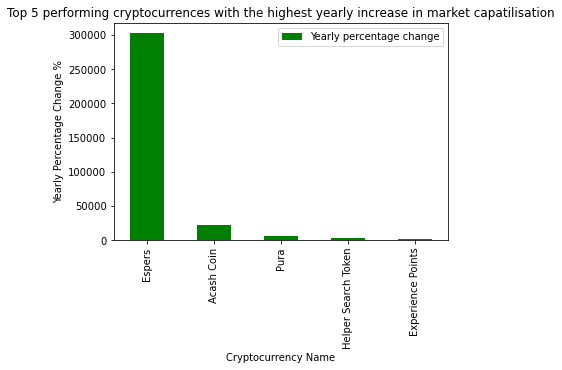

In [7]:
top_df.plot.bar(x='crypto_name', y='pct_ch', color = 'green', label = 'Yearly percentage change')
plt.xlabel('Cryptocurrency Name')
plt.ylabel('Yearly Percentage Change %')
plt.title('Top 5 performing cryptocurrences with the highest yearly increase in market capatilisation')
plt.savefig("Best performers", dpi=300)

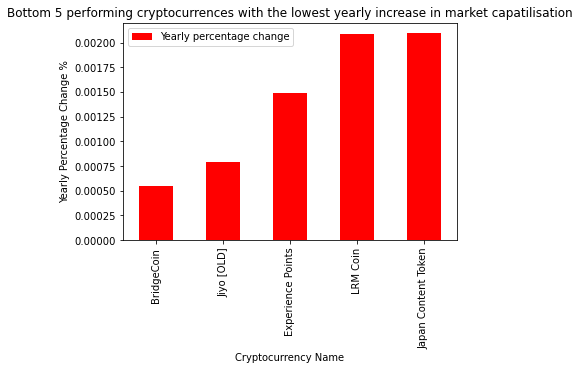

In [6]:
bottom_df.plot.bar(x='crypto_name', y='pct_ch', color = 'red', label = 'Yearly percentage change')
plt.xlabel('Cryptocurrency Name')
plt.ylabel('Yearly Percentage Change %')
plt.title('Bottom 5 performing cryptocurrences with the lowest yearly increase in market capatilisation')
plt.savefig("Worst performers")